In [1]:
import uproot
import awkward as ak
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
features = [
    "ph2_isUpper", "ph2_order", "ph2_rod",
    "ph2_layer", "ph2_subdet", "ph2_side",
    "ph2_module", "ph2_moduleType", "ph2_simHitIdx",
    "ph2_x", "ph2_y", "ph2_z", "ph2_clustSize",
]

In [3]:
rpath = Path("/Users/alexandertuna/Downloads/cms/lst_playing/data/trackingNtuple.2025_04_12_00h00m00s.10muon_0p5_5p0.root")
tname = "trackingNtuple/tree"
with uproot.open(rpath) as fi:
    tree = fi[tname]
    data = tree.arrays(features)
nph2 = len(ak.flatten(data["ph2_isUpper"]))
print(f"Number of ph2 hits: {nph2}")

Number of ph2 hits: 5353118


In [4]:
data["ph2_isBarrelFlat"] = (data["ph2_order"] == 0) & (data["ph2_side"] == 3)
data["ph2_isBarrelTilt"] = (data["ph2_order"] == 0) & (data["ph2_side"] != 3)
data["ph2_isEndcap"] = (data["ph2_order"] != 0)
print(data["ph2_isBarrelFlat"])

[[False, False, False, False, False, ..., True, True, True, True, True], ...]


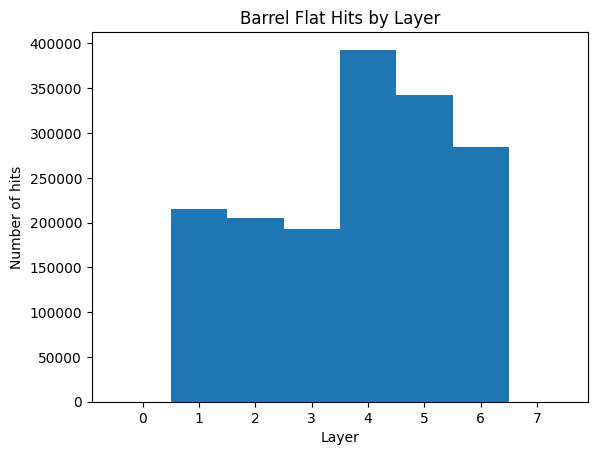

In [5]:
mask = data["ph2_isBarrelFlat"]
fig, ax = plt.subplots()
_ = ax.hist(ak.flatten(data["ph2_layer"][mask]), bins=np.arange(-0.5, 8.5, 1))
ax.set_xlabel("Layer")
ax.set_ylabel("Number of hits")
ax.set_title("Barrel Flat Hits by Layer");

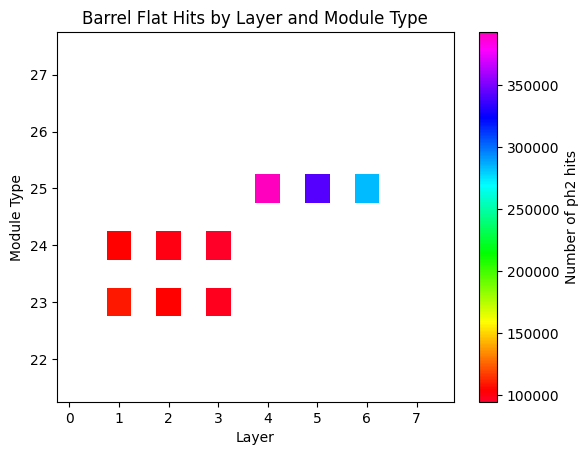

In [6]:
mask = data["ph2_isBarrelFlat"]
fig, ax = plt.subplots()
xbins = np.arange(-0.25, 8.0, 0.5)
ybins = np.arange(21.25, 28.0, 0.5)
_, _, _, im = ax.hist2d(ak.flatten(data["ph2_layer"][mask]).to_numpy(),
                        ak.flatten(data["ph2_moduleType"][mask]).to_numpy(),
                        cmin=0.5,
                        cmap="gist_rainbow",
                        bins=[xbins, ybins],
                        )
fig.colorbar(im, ax=ax, label="Number of ph2 hits")
ax.set_xlabel("Layer")
ax.set_ylabel("Module Type")
ax.set_title("Barrel Flat Hits by Layer and Module Type");

In [7]:
# From https://github.com/cms-sw/cmssw/blob/master/Geometry/TrackerGeometryBuilder/interface/TrackerGeometry.h
from enum import auto, Enum
class ModuleType(Enum):
    # NB: `auto()` starts at 1
    # UNKNOWN = auto()
    PXB = auto()
    PXF = auto()
    IB1 = auto()
    IB2 = auto()
    OB1 = auto()
    OB2 = auto()
    W1A = auto()
    W2A = auto()
    W3A = auto()
    W1B = auto()
    W2B = auto()
    W3B = auto()
    W4 = auto()
    W5 = auto()
    W6 = auto()
    W7 = auto()
    Ph1PXB = auto()
    Ph1PXF = auto()
    Ph2PXB = auto()
    Ph2PXF = auto()
    Ph2PXB3D = auto()
    Ph2PXF3D = auto()
    Ph2PSP = auto()
    Ph2PSS = auto()
    Ph2SS = auto()

print("PS pixel", ModuleType.Ph2PSP.value)
print("PS strip", ModuleType.Ph2PSS.value)
print("2S strip", ModuleType.Ph2SS.value)

PS pixel 23
PS strip 24
2S strip 25
